In [1]:
import pandas as pd
import plotly.express as ex
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [7]:
dtlz = pd.read_csv("./data.csv")
wfg = pd.read_csv("./wfg_data.csv")

In [8]:
data = pd.concat([wfg, dtlz], ignore_index=True)

In [10]:
all_cols = list(data.columns)
categories = ["asf", "norm"]
iterations = [1,2,3,4]
ranks = [1,2,3,4,5,6]

for cat in categories:
    cols = [name for name in all_cols if "median" in name and cat in name]
    for it in iterations:
        vals = data[data["iteration"]==it][cols]
        order = np.argsort(vals.values, axis=1)
        ranked = np.empty_like(order)
        for row, row_order in enumerate(order):
            ranked[row, row_order] = ranks
        data.loc[vals.index, cols] = ranked

In [40]:
data["problem"][["D" in x for x in data["problem"]]] = ["Z" + name for name in list(data["problem"][["D" in x for x in data["problem"]]])]

/home/rishi/.virtualenvs/desdeo-emo/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [104]:
heatmap_data_all

,num_obj,iteration,num_gens,RVEA,NSGAIII,iRVEA,iNSGAIII,NIMBUS-RVEA,NIMBUS-NSGAIII,RVEA_min_asf,...,iRVEA_num_solns,iNSGAIII_num_solns,NIMBUS-RVEA_num_solns,NIMBUS-NSGAIII_num_solns,RVEA_num_func_eval,NSGAIII_num_func_eval,iRVEA_num_func_eval,iNSGAIII_num_func_eval,NIMBUS-RVEA_num_func_eval,NIMBUS-NSGAIII_num_func_eval
problem,,,,,,,,,,,,,,,,,,,,,
DTLZ2,3,1,100,5.0,6.0,4.0,3.0,2.0,1.0,0.248817,...,108,105,49,50,10589,10705,10381,10705,4754,5050
DTLZ2,3,2,100,6.0,5.0,3.0,2.0,4.0,1.0,0.020447,...,108,105,14,50,21189,21305,19135,21305,6802,10050
DTLZ2,3,3,100,6.0,5.0,4.0,3.0,2.0,1.0,-0.018588,...,108,105,21,50,31789,31905,27055,31905,7896,15050
DTLZ2,3,4,100,6.0,5.0,4.0,3.0,1.0,2.0,0.227555,...,108,105,50,50,42389,42505,36125,42505,11206,20050
DTLZ2,3,1,150,5.0,6.0,4.0,3.0,1.0,2.0,-0.158272,...,108,105,50,50,15907,16005,15563,16005,7170,7550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WFG9,9,4,100,6.0,5.0,4.0,3.0,1.0,2.0,0.557697,...,174,165,49,50,64967,66565,58621,66565,18412,20050
WFG9,9,1,100,6.0,3.0,5.0,4.0,1.0,2.0,0.581511,...,168,165,47,50,15351,16765,11087,16765,4504,5050
WFG9,9,2,100,4.0,6.0,5.0,3.0,2.0,1.0,0.421287,...,174,165,49,50,31775,33365,27477,33365,9202,10050


<IPython.core.display.Javascript object>


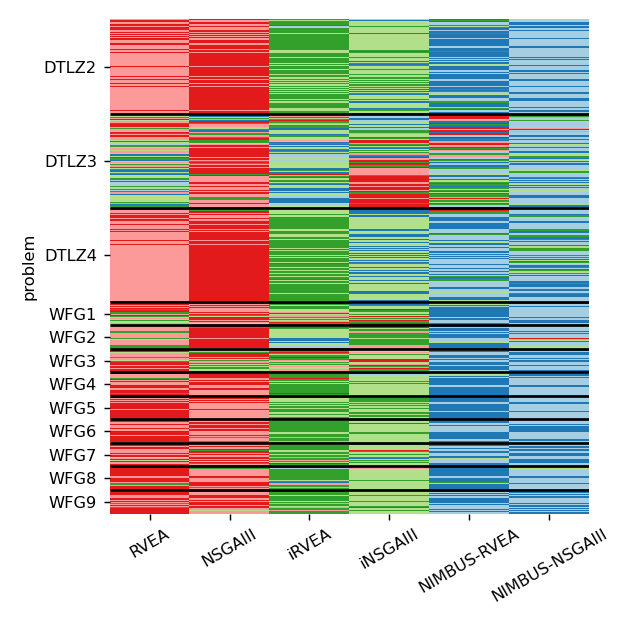

In [14]:
heatdata_cols = [name for name in all_cols if "median" in name and "asf" in name]
renamed_cols = {a: a.split('_')[0] for a in heatdata_cols}
heatmap_data_all = data.rename(columns=renamed_cols)
heatmap_data_all = heatmap_data_all.sort_values(by=["problem", "num_obj"]).set_index(["problem"])
#list(renamed_cols.values())[::-1]
#["problem", "num_obj", "num_gens"])

font_size=9

problem_names = heatmap_data_all.index.unique()

plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=font_size)
plt.rc('ytick', labelsize=font_size)
plt.rc('axes', labelsize=font_size)

width = 2.4 *2
height = width 

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)
fig.set_size_inches(width, height)
cmap = sns.color_palette("Paired", 6)
sns.heatmap(
        heatmap_data_all[renamed_cols.values()],
        cmap=cmap,
        cbar=False,
        cbar_kws={'label': 'Ranks'},
        axes=ax, yticklabels=problem_names)

count = [0]
for line_num, tick in enumerate(problem_names):
    count.append(count[-1] + len(heatmap_data_all[heatmap_data_all.index==tick]))

ax.hlines(count[1:-1], *ax.get_xlim())
ax.set_yticks([(count[i] + count[i+1])/2 for i in range(len(count)-1)])
plt.xticks(rotation=30)
#plt.title("Algorithms ranked according to median\nASF values of the returned solutions")
plt.tight_layout()
plt.show()

fig.savefig('DTLZ_wfg_asf_heatmap_no_legend.pdf')

In [85]:
heatdata_cols = [name for name in all_cols if "median" in name and "asf" in name]
renamed_cols = {a: a.split('_')[0] for a in heatdata_cols}
heatmap_data_all = data.rename(columns=renamed_cols)
heatmap_data_all= heatmap_data_all.reset_index(drop=True)
#heatmap_data_all.sort_values(by=["problem", "num_obj"])

In [95]:
print(list(data.reset_index().index))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [96]:
data

,problem,num_obj,iteration,num_gens,RVEA_median_asf,NSGAIII_median_asf,iRVEA_median_asf,iNSGAIII_median_asf,NIMBUS-RVEA_median_asf,NIMBUS-NSGAIII_median_asf,...,iRVEA_num_solns,iNSGAIII_num_solns,NIMBUS-RVEA_num_solns,NIMBUS-NSGAIII_num_solns,RVEA_num_func_eval,NSGAIII_num_func_eval,iRVEA_num_func_eval,iNSGAIII_num_func_eval,NIMBUS-RVEA_num_func_eval,NIMBUS-NSGAIII_num_func_eval
0,WFG1,3,1,100,0.730858,0.500443,0.446974,0.315815,0.401792,0.273648,...,106,105,50,50,499,10705,7059,10705,3004,5050
1,WFG1,3,2,100,0.637463,0.456612,0.354949,0.329259,0.266786,0.205789,...,107,105,49,50,1317,21305,16249,21305,7640,10050
2,WFG1,3,3,100,0.485726,0.462914,0.600882,0.286775,0.299985,0.298626,...,107,105,50,50,3501,31905,25879,31905,12360,15050
3,WFG1,3,4,100,0.805307,0.586482,0.566878,0.426465,0.439899,0.411975,...,107,105,49,50,4443,42505,34229,42505,17140,20050
4,WFG2,3,1,100,0.248496,0.287000,0.104323,0.114822,0.024508,0.014078,...,107,105,41,50,8649,10705,9693,10705,3984,5050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,DTLZ3,9,4,250,4.000000,5.000000,3.000000,6.000000,1.000000,2.000000,...,174,165,43,50,165143,166165,165485,166165,40556,50050
584,DTLZ4,9,1,250,5.000000,6.000000,4.000000,3.000000,2.000000,1.000000,...,174,165,50,50,39747,41665,38083,41665,10428,12550
585,DTLZ4,9,2,250,5.000000,6.000000,4.000000,3.000000,2.000000,1.000000,...,174,165,8,50,81247,83165,80351,83165,20060,25050
586,DTLZ4,9,3,250,5.000000,6.000000,4.000000,2.000000,3.000000,1.000000,...,174,165,14,50,122747,124665,122829,124665,30486,37550
